# Urban Air Quality

#### Predictive Modeling and Analysis of Air Quality in Mongolia

The environment and public health are greatly impacted by air quality, particularly in metropolitan areas where pollution levels are frequently high. Air pollution is a serious problem in Mongolia, especially in Ulaanbaatar. PM2.5, or fine particulate matter, is the main pollutant of concern since it can enter the respiratory system deeply and provide serious health hazards. This project's goal is to examine Ulaanbaatar's 2023 air pollution data, with a particular emphasis on PM2.5 levels.

In this project, the dataset will be gathered and prepared, exploratory data analysis will be conducted to comprehend pollution trends, machine learning models will be implemented for forecasting, and actionable insights will be presented. This study targets a critical environmental and public health concern in Mongolia by concentrating on the air quality in Ulaanbaatar. The following specific goals will be pursued:

1. Data Loading and Exploration:
Load the data, check its structure, and perform initial cleaning.

2. Exploratory Data Analysis (EDA):
Generate descriptive statistics, create visualizations, and identify patterns.

3. Data Preprocessing;
Handle missing data, scale values, and engineer new features.

4. Machine Learning Models:
Train, test, and evaluate models for predicting PM2.5 levels.

5. Insights and Recommendations

# Understanding and Cleaning the Data

Import Libraries and Load Data

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
%matplotlib inline

In [231]:
df=pd.read_csv("Ulaanbaatar_PM2.5_2023_YTD.csv")

In [233]:
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Ulaanbaatar,PM2.5 - Principal,2023-01-01 01:00 AM,2023,1,1,1,540.3,526,Hazardous,620.0,UG/M3,1 Hr,Valid
1,Ulaanbaatar,PM2.5 - Principal,2023-01-01 02:00 AM,2023,1,1,2,596.2,563,Hazardous,652.0,UG/M3,1 Hr,Valid
2,Ulaanbaatar,PM2.5 - Principal,2023-01-01 03:00 AM,2023,1,1,3,554.1,535,Hazardous,512.0,UG/M3,1 Hr,Valid
3,Ulaanbaatar,PM2.5 - Principal,2023-01-01 04:00 AM,2023,1,1,4,415.6,444,Hazardous,277.0,UG/M3,1 Hr,Valid
4,Ulaanbaatar,PM2.5 - Principal,2023-01-01 05:00 AM,2023,1,1,5,276.8,327,Hazardous,138.0,UG/M3,1 Hr,Valid


Check for basic information about the dataset:

In [236]:
df.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000
mean,2023.000136,6.051946,16.186084,11.504408,51.001058,98.336905,49.834396
std,0.011646,3.455458,9.019502,6.931718,84.273509,93.242200,99.220532
min,2023.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2023.000000,3.000000,8.000000,5.000000,9.300000,39.000000,8.000000
50%,2023.000000,6.000000,16.000000,12.000000,19.400000,66.000000,18.000000
75%,2023.000000,8.000000,24.000000,18.000000,63.400000,155.000000,55.000000
max,2024.000000,12.000000,31.000000,23.000000,596.200000,563.000000,985.000000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           7373 non-null   object 
 1   Parameter      7373 non-null   object 
 2   Date (LT)      7373 non-null   object 
 3   Year           7373 non-null   int64  
 4   Month          7373 non-null   int64  
 5   Day            7373 non-null   int64  
 6   Hour           7373 non-null   int64  
 7   NowCast Conc.  7373 non-null   float64
 8   AQI            7373 non-null   int64  
 9   AQI Category   7363 non-null   object 
 10  Raw Conc.      7373 non-null   float64
 11  Conc. Unit     7373 non-null   object 
 12  Duration       7373 non-null   object 
 13  QC Name        7373 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 806.6+ KB


In [240]:
df.shape

(7373, 14)

In [242]:
df.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

Checking if our dataset contains any NULL values

In [245]:
df.isnull().sum()

Site              0
Parameter         0
Date (LT)         0
Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI               0
AQI Category     10
Raw Conc.         0
Conc. Unit        0
Duration          0
QC Name           0
dtype: int64

In [247]:
df['AQI Category'].unique()

array(['Hazardous', 'Very Unhealthy', 'Unhealthy',
       'Unhealthy for Sensitive Groups', 'Moderate', nan, 'Good'],
      dtype=object)

In [249]:
#Fill missing values with the mode (most frequent category)
df['AQI Category'] = df['AQI Category'].fillna(df['AQI Category'].mode()[0])
# Verify the missing values again
missing_values_after = df.isnull().sum()
print(missing_values_after)

Site             0
Parameter        0
Date (LT)        0
Year             0
Month            0
Day              0
Hour             0
NowCast Conc.    0
AQI              0
AQI Category     0
Raw Conc.        0
Conc. Unit       0
Duration         0
QC Name          0
dtype: int64


In [251]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

Site            0
Parameter       0
Date (LT)       0
AQI Category    0
Conc. Unit      0
Duration        0
QC Name         0
dtype: int64

Date/Time Feature: The Date (LT), Year, Month, Day, and Hour can be used to create time-based features 

In [254]:
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
df['hour_of_day'] = df['Date (LT)'].dt.hour
df['day_of_week'] = df['Date (LT)'].dt.dayofweek
df['month'] = df['Date (LT)'].dt.month

## Exploratory Data Analysis (EDA) Plots

Feature Selection

In [264]:
X = df.drop(['AQI', 'Date (LT)', 'AQI Category', 'QC Name','Duration'], axis=1)  # Drop non-relevant columns
y = df['AQI']  # Target variable (AQI for regression)

In [266]:
X

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,Raw Conc.,Conc. Unit,hour_of_day,day_of_week,month
0,Ulaanbaatar,PM2.5 - Principal,2023,1,1,1,540.3,620.0,UG/M3,1,6,1
1,Ulaanbaatar,PM2.5 - Principal,2023,1,1,2,596.2,652.0,UG/M3,2,6,1
2,Ulaanbaatar,PM2.5 - Principal,2023,1,1,3,554.1,512.0,UG/M3,3,6,1
3,Ulaanbaatar,PM2.5 - Principal,2023,1,1,4,415.6,277.0,UG/M3,4,6,1
4,Ulaanbaatar,PM2.5 - Principal,2023,1,1,5,276.8,138.0,UG/M3,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Ulaanbaatar,PM2.5 - Principal,2023,12,31,20,84.3,129.0,UG/M3,20,6,12
7369,Ulaanbaatar,PM2.5 - Principal,2023,12,31,21,111.6,139.0,UG/M3,21,6,12
7370,Ulaanbaatar,PM2.5 - Principal,2023,12,31,22,113.8,116.0,UG/M3,22,6,12
7371,Ulaanbaatar,PM2.5 - Principal,2023,12,31,23,118.9,124.0,UG/M3,23,6,12


In [268]:
numerical_columns = ['NowCast Conc.', 'AQI', 'Raw Conc.']

Plot Histograms Use Matplotlib or Seaborn to plot the histograms of these numerical features.

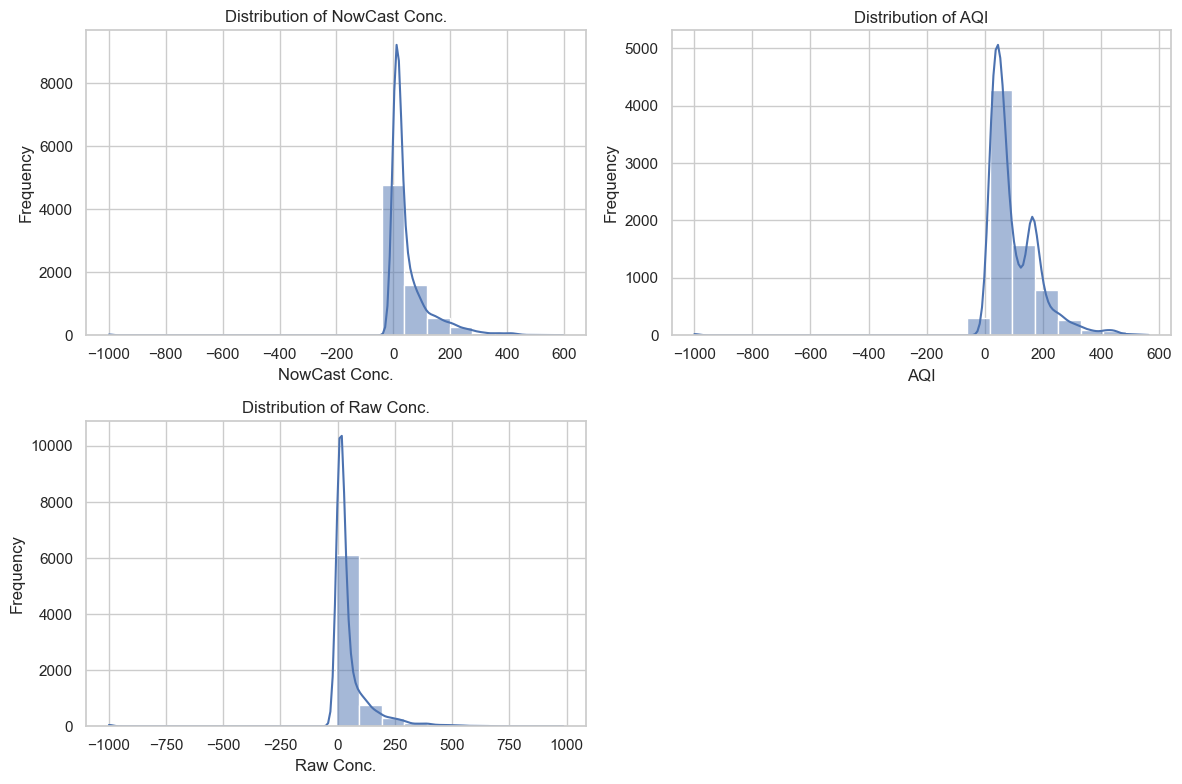

In [271]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each numerical column
plt.figure(figsize=(12, 8))

# Plot histograms
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # 2 rows and 2 columns of subplots
    sns.histplot(df[column], kde=True, bins=20)  # kde=True to add Kernel Density Estimate (smooth curve)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to avoid overlapping subplots
plt.show()


Relationship Between Air Quality Index and NowCast Concentration

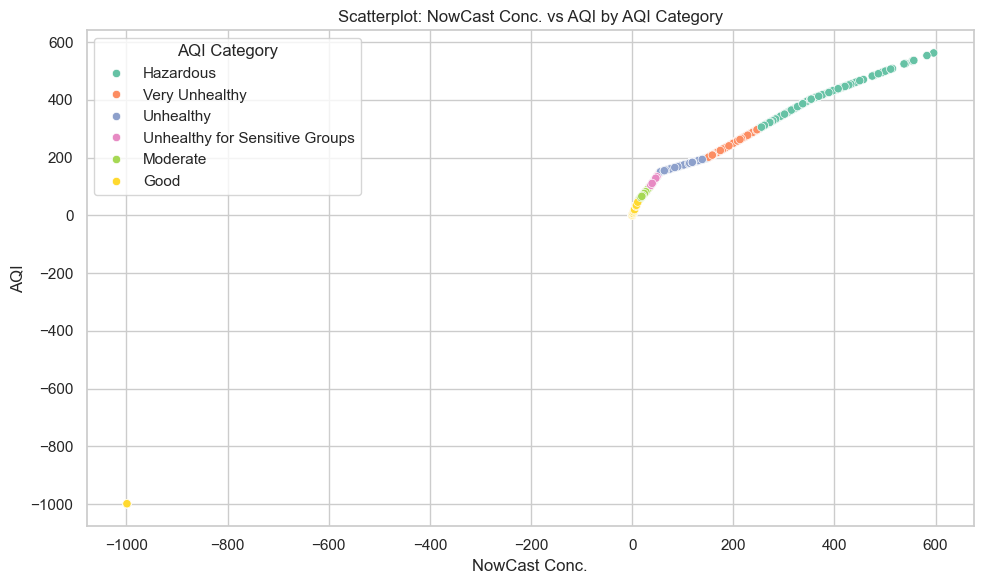

In [283]:
# Scatterplot with hue based on 'AQI Category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NowCast Conc.', y='AQI', hue='AQI Category', palette='Set2')

# Set titles and labels
plt.title('Scatterplot: NowCast Conc. vs AQI by AQI Category')
plt.xlabel('NowCast Conc.')
plt.ylabel('AQI')

# Show plot
plt.tight_layout()
plt.show()

### Time Series Plot

Purpose: To show how air quality (AQI or NowCast Conc.) changes over time.

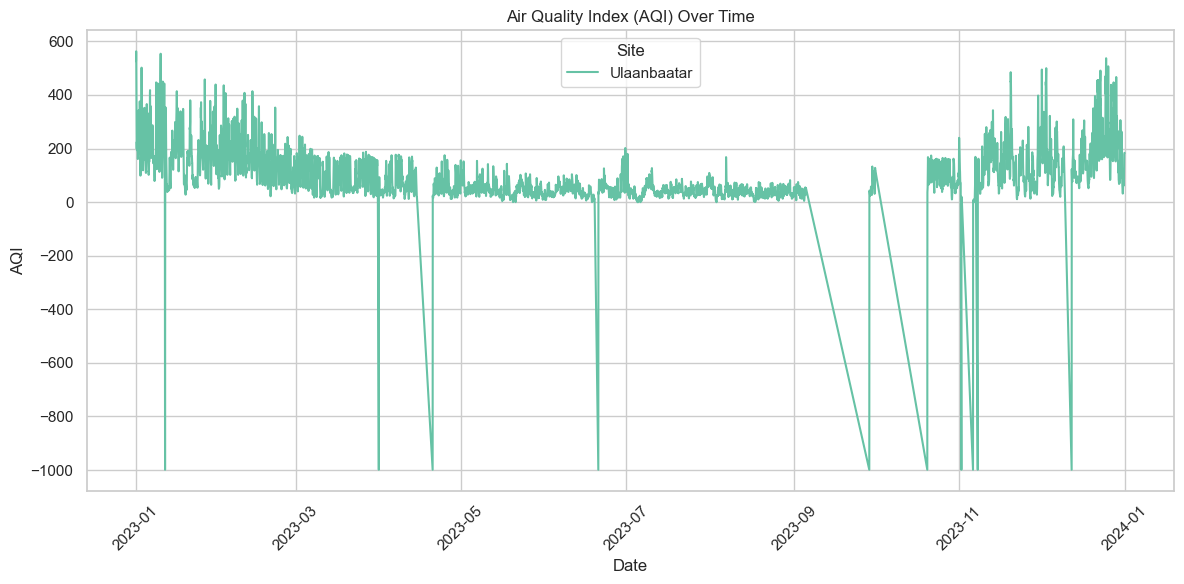

In [284]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date (LT)', y='AQI', hue='Site', palette='Set2')
plt.title('Air Quality Index (AQI) Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Histogram to understand the distribution of AQI

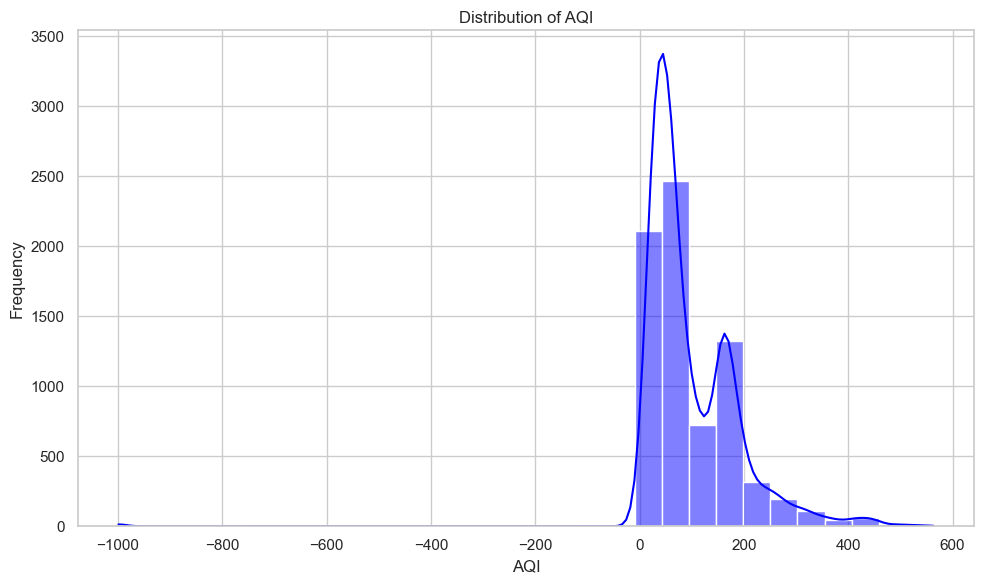

In [289]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], kde=True, bins=30, color='blue')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


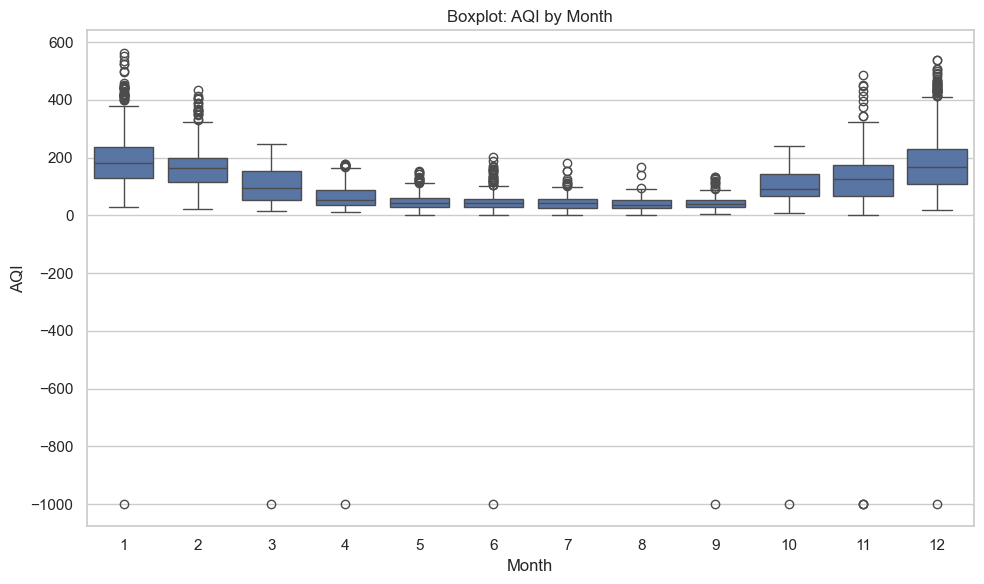

In [314]:
# Boxplot for AQI by Month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='AQI')
plt.title('Boxplot: AQI by Month')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.tight_layout()
plt.show()


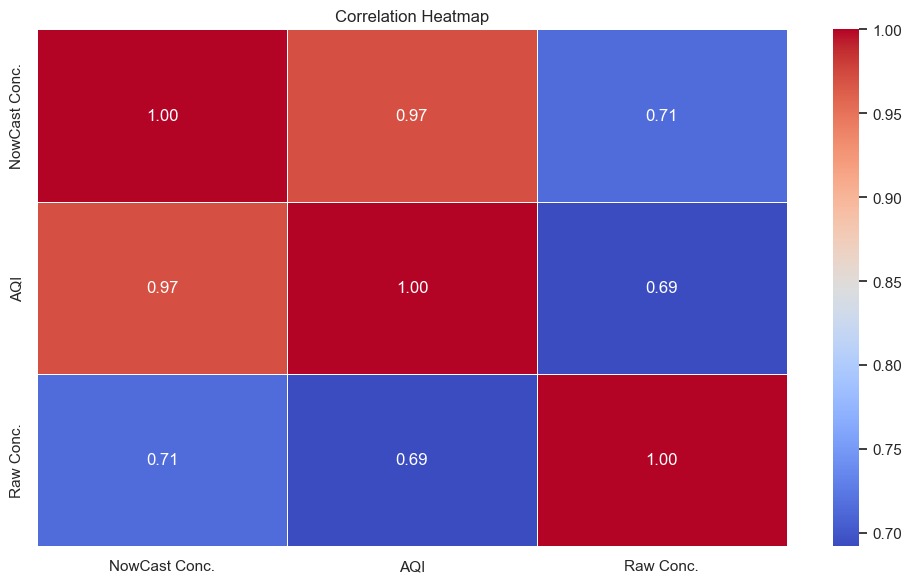

In [296]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['NowCast Conc.', 'AQI', 'Raw Conc.']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Strong positive correlation: AQI and NowCast Conc have a strong positive correlation, it was 0.97 which is near 1. Low or no correlation: If the value is near 0, it means that there's no significant linear relationship between those two features.

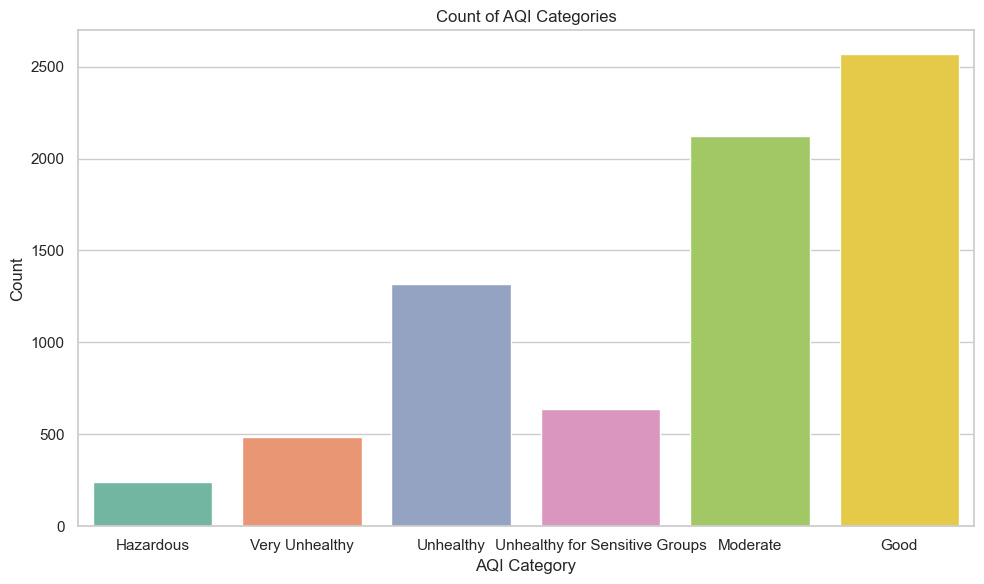

In [308]:
# Countplot for AQI Category with hue
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AQI Category', hue='AQI Category', palette='Set2', legend=False)
plt.title('Count of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


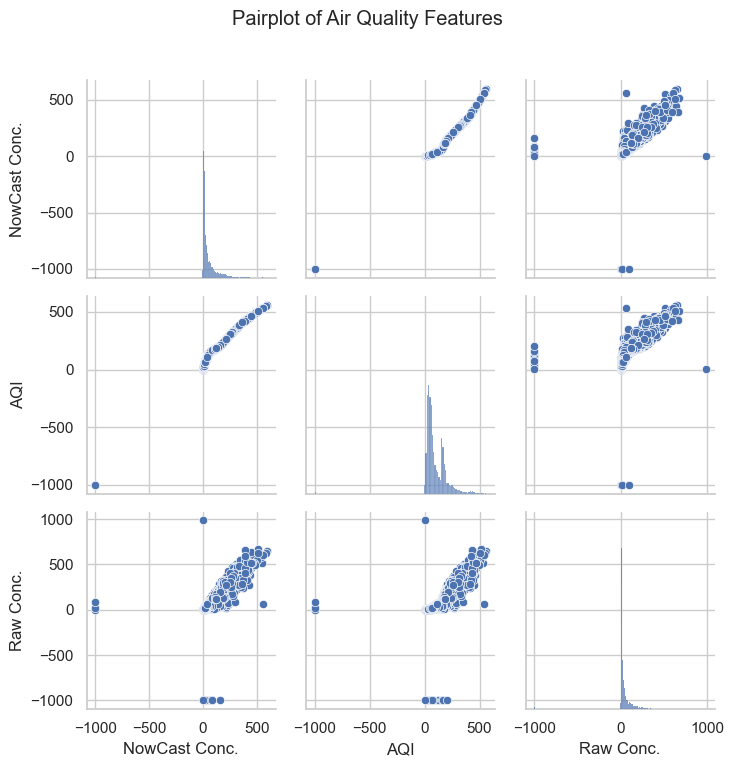

In [300]:
sns.pairplot(df[['NowCast Conc.', 'AQI', 'Raw Conc.']])
plt.suptitle('Pairplot of Air Quality Features', y=1.02)
plt.tight_layout()
plt.show()


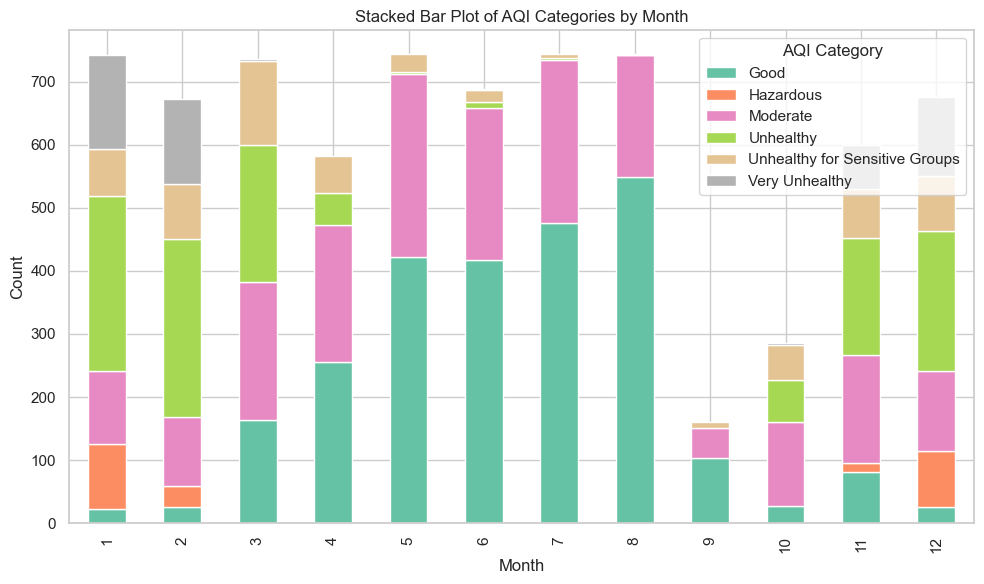

In [306]:
df_grouped = df.groupby(['Month', 'AQI Category']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Stacked Bar Plot of AQI Categories by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Machine Learning Models